In [1]:
import matplotlib.pyplot as plt
import pickle

In [2]:
# Just some matplotlib tweaks
import matplotlib as mpl

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"

mpl.rcParams["lines.markeredgewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("font", family="serif")
rc("text", usetex=True)
rc("xtick", labelsize="medium")
rc("ytick", labelsize="medium")
rc("axes", labelsize="large")


def cm2inch(value):
    return value / 2.54

In [3]:
with open("../new_bimamba/loss_6_features_new_bimamba_MSD.pickle", "rb") as f:
    loss_deeper = pickle.load(f)

with open(
    "../simple_models_more_features/simple_model_more_featuers.pickle", "rb"
) as f:
    loss_simple = pickle.load(f)

In [4]:
loss_deeper.keys()

dict_keys(['total_alpha_loss', 'total_classification_loss', 'total_K_loss', 'test_alpha_loss', 'test_classification_loss', 'test_K_loss'])

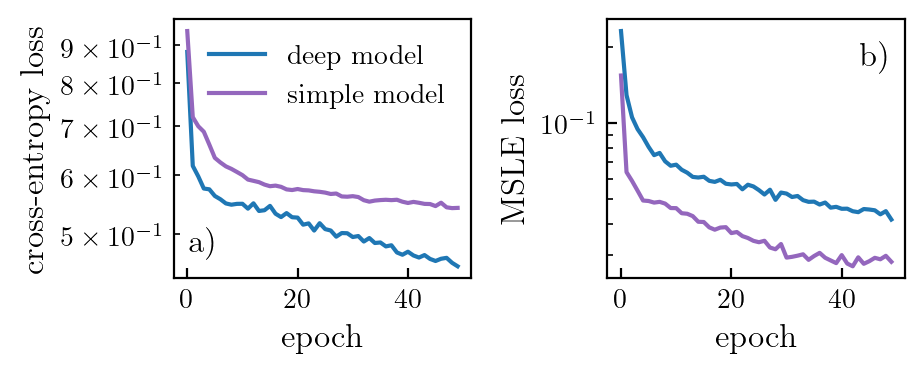

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(cm2inch(12), cm2inch(5)))

ax1.semilogy(
    loss_deeper["total_classification_loss"], color="tab:blue", label="deep model"
)

ax1.plot(
    loss_simple["total_classification_loss"], color="tab:purple", label="simple model"
)
ax1.legend(frameon=False)
ax1.set_xlabel("epoch")
ax1.set_ylabel("cross-entropy loss")
ax1.text(
    0.15,
    0.2,
    "a)",
    transform=ax1.transAxes,
    fontsize=12,
    fontweight="bold",
    va="top",
    ha="right",
)


ax2.semilogy(loss_deeper["total_K_loss"], color="tab:blue", label="deep model")
ax2.plot(loss_simple["total_K_loss"], color="tab:purple", label="simple model")
ax2.set_xlabel("epoch")
ax2.set_ylabel("MSLE loss")

ax2.text(
    0.95,
    0.92,
    "b)",
    transform=ax2.transAxes,
    fontsize=12,
    fontweight="bold",
    va="top",
    ha="right",
)


plt.tight_layout()
plt.savefig("classification_MSLE_loss.pdf")